## Project: Train a Smartcab to Drive

-----

## Getting Started
In this project, we will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:** The smartcab does not move at all during the simulation. The agent seems to receive rewards baesd on its activity and position on the road. Since the car stayed idle at all time whenever the signal had red light the car received a positive reward and when there was green light and there was no oncoming traffic it received a negative reward. This seemed to happen continuously while I was running the simulation

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:** : <br />
1) Flags in agent.py
• Display : This flag is used to enable the visual simulation that Pygame GUI provides if set to True it enables.
• Alpha : The alpha flag is there to control the learning rate by default it is set to 0.5. If set to 0 the agent would never change its behaviour.
• Learning : This flag is set to True if you the agent to learn using Q-learning. Currently we are not using Q-learning, this flag is set to False by default.

2) Whenever the agent performs an action the act environment class function is called. It helps to take actions in the environment and henceforth receive rewards

3) The render_text() function gives output of each step of the simulation on the command line while the render() function displays it on the GUI using the Pygame library.

4) In the planner.py Python file the 'next_waypoint()' function will consider the East-West orientation first and then the North-South orietation.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


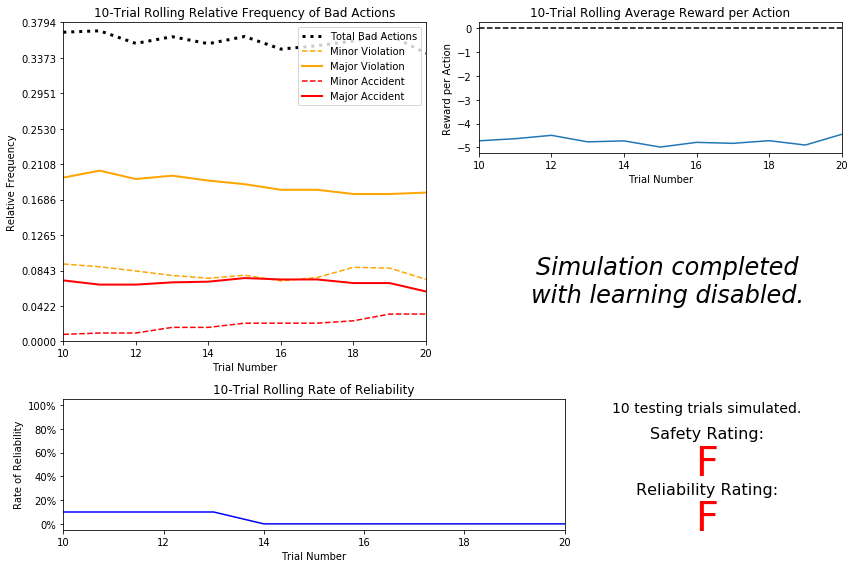

In [7]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**  <br />
1) The agent tends to make bad decisions about 38 % of the time out of which 8 % of them are major accidents and 21% seems to be major violations. <br />
2) The reliability rating makes sense because every time the cab moves every action that it chooses and the state it end's up is uncertain and the agent never seems to reach the destination thus the reliability rating obtained makes sense. <br />
3) The rewards that the agent is getting seems to gradually rise over time from around - 5 to -4 overall the cab received negative rewards on average where it was choosing the actions randomly <br />
4) The result does not change significantly overtime as we can see that initially the cab had around 10 % rate of reliability which decreases to 0 after 13 trials emphasizing that the cab is not able to learn in this random action selection approach.
<br />
5) Looking from the above observation the smartcab does not even come close to consider it to be safe or reliable for its passengers.  It has no reliability, no ability to learn, and is highly unsafe.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:** : The features I think that are most relevant for learning both safety and efficieny are : inputs : light, left, oncoming; waypoint

• Input lights : The Smartcab should know the color of the light to learn the traffic rules so that it can improve upon time and not cause any unwanted accidents or any traffic violations.<br />
• Input left : This parameter gives information regarding the direction the vehicle to the left of Smartcab wants to go. This will be helpful in avoiding accidents and getting better safety and reliability.<br />
• Oncoming : The smartcab should know if there is a vehicle coming in the opposite direction when it is trying to make a left turn, so as to not go into a road with oncoming traffic when deciding to turn left. If the agent decides to drive into oncoming traffic, then it will cause either a minor traffic violation or, if there is a vehicle present, a major accident.<br />
• Waypoint : This parameter is necessary because the smartcab must know whether the actions it is taking is helping to reach the destination or not. This will be very helpful in increasing the efficiency of the smartcab
<br />
The following features I found to be irrelevant for learning:<br />
• Input right : 'right' input is not necessary according to rules in US, because in case of a green light or a red light, the right lane traffic wil never interfer with the cab's direction (according to this rules https://www.dmv.org/travel/us-road-rules.php). Also the same rules are being applied to our environment so including Input right in our state space would not contribute to learning.
<br />
• Deadline : Deadline is a good feature if you want the cab to reach destination in the shortest number of steps, but it can learn this by the rewards it receives as it builds it's Q table. Without the deadline I believe the smarcab will be able to learn to drive more safely and break less number of traffic violations and be more reliable.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:** : For every feature the actions to learn are : <br />
• Light : 2 possible states (red, green) <br />
• waypoint : 3 (forward, left, right)<br />
• left : 4 (forward, left, right, none)<br />
• right : 4(forward, left, right, none)<br />
• oncoming : 4(forward, left, right, none)<br />
• deadline : 0 to 5 ( number of intersections 5 time steps per intersection)<br />

If we take all the available features the state would be very large and for 20 training trials I don't think the cab would be able to get relevant information for learning.<br />
Instead to make the state space smaller I choose to only select the features I think would be most relevant for the learning and that would be (waypoint, inputs['light'], input['left'], inputs['oncoming'])<br />
Thus the resultant state space would be 2 x 3 x 4 x 4 = 96 states  <br />
This is not a large number, so I believe the driving agent could learn a policy for each possible state within a reasonable number of training trials.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

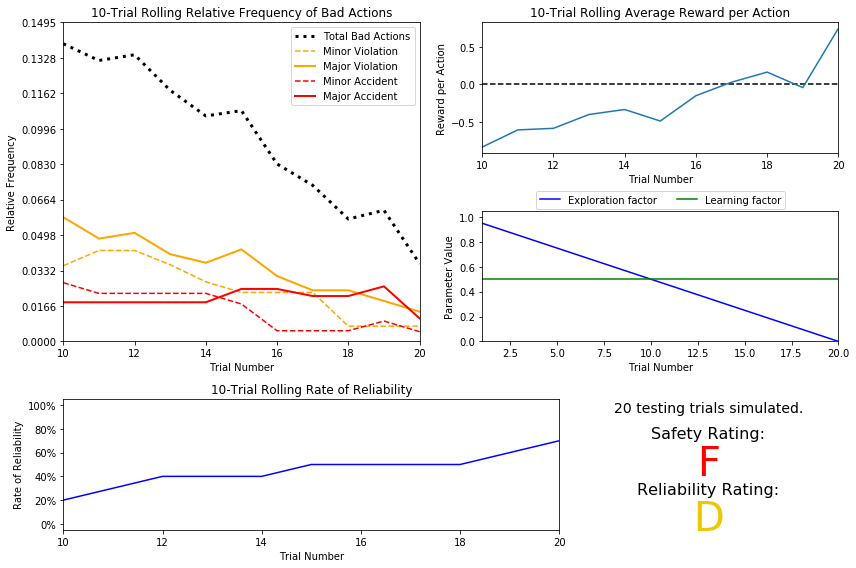

In [3]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:** : From the above observations the cab seems improve its safety and reliability it now seems to make bad decissions from 14% to 4 % of the time also the number of major accidents amd minor violations occured has decreased to 1%. Also the rate of reliability has increased to around  70%. The avreage reward the agent received is around 0.2 which is a great improvement from the previous one which was -4.
<br />
After 20 training trials the driving agent starts testing. This number makes sense because 1 / 0.05 is 20 i.e after 20 times 1 is subracted by 0.05 it vanishes to 0.
<br />
Yes the decaying function implemented for $\epsilon$ is accurately represented in the parameters panel.
<br />
Yes as the training trials increased the number of bad actions decreased quite a lot from 14 % to nearly 3.5 % also the reward gain improved from -0.2 to 0.5 and above.
<br />
The safety measure still is F and the reliability improved from F to D.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

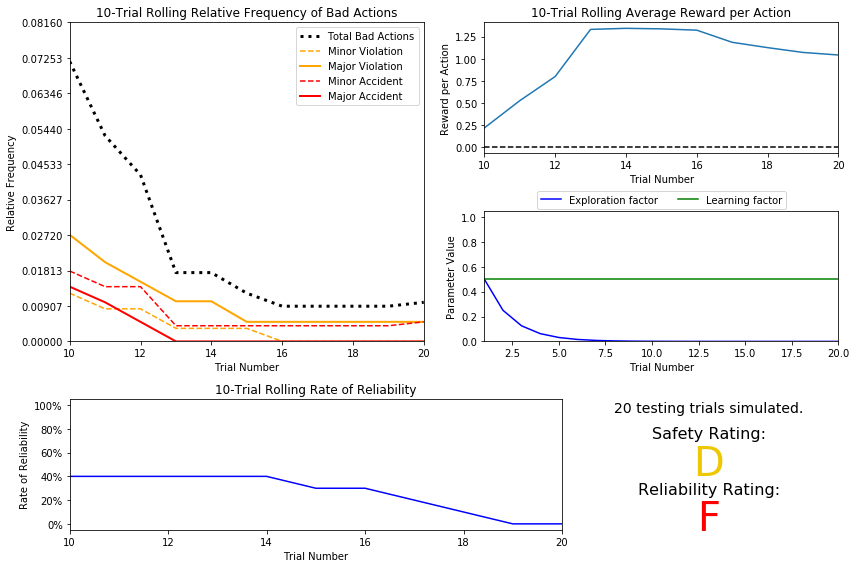

In [14]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation

#tolerance = 0.005
#update_delay = 0.01
#alpha = 0.88

# epsilon = apha ** (trial_count)
vs.plot_trials('sim_improved-learning.csv')

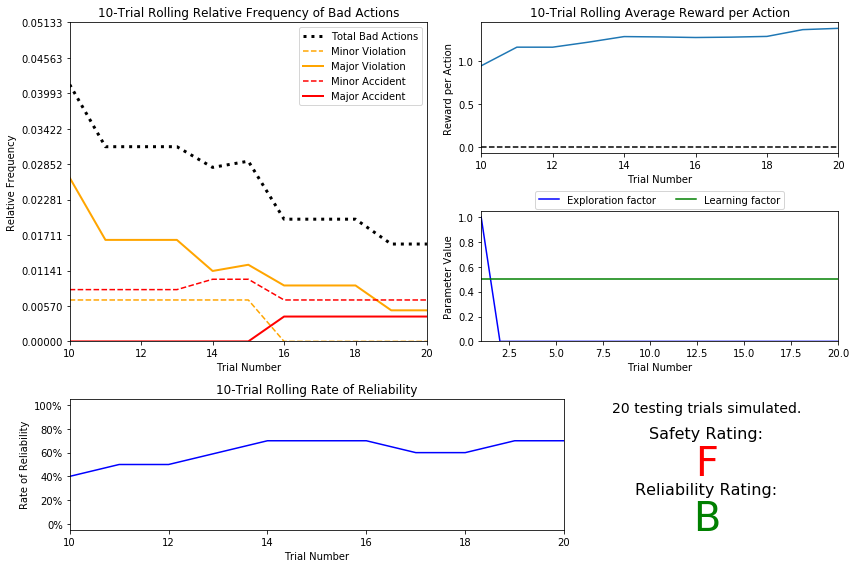

In [15]:
#tolerance = 0.005
#update_delay = 0.01
#alpha = 0.5

# epsilon = 1 / (trial_count)^2
vs.plot_trials('sim_improved-learning.csv')

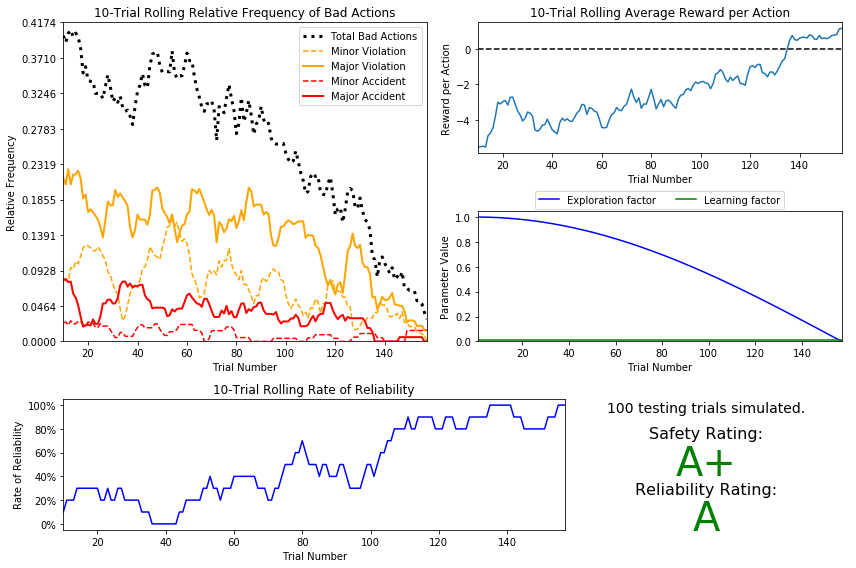

In [6]:
#tolerance = 0.001
#update_delay = 0.01
#alpha = 0.01
# epsilon = math.fabs(math.cos(self.alpha*self.trial))
vs.plot_trials('sim_improved-learning.csv')

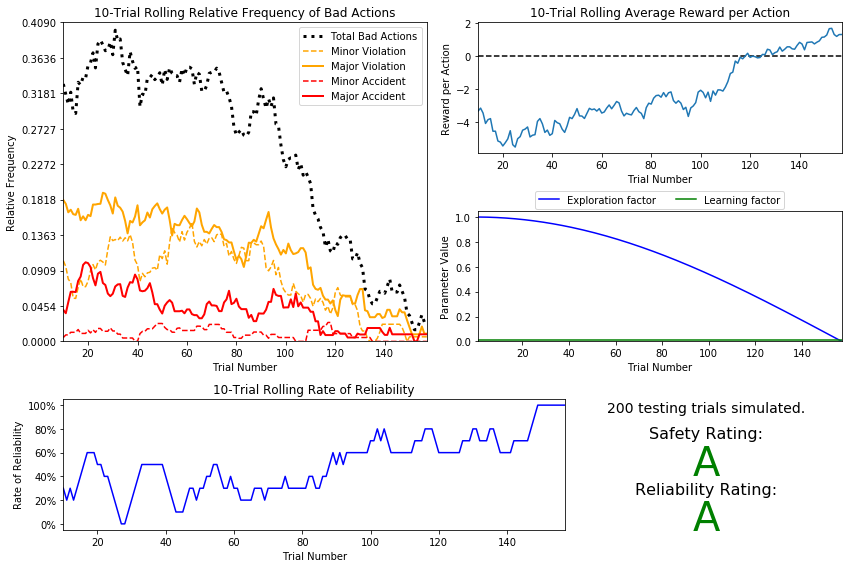

In [7]:
#with 200 testing trials
vs.plot_trials('sim_improved-learning.csv')

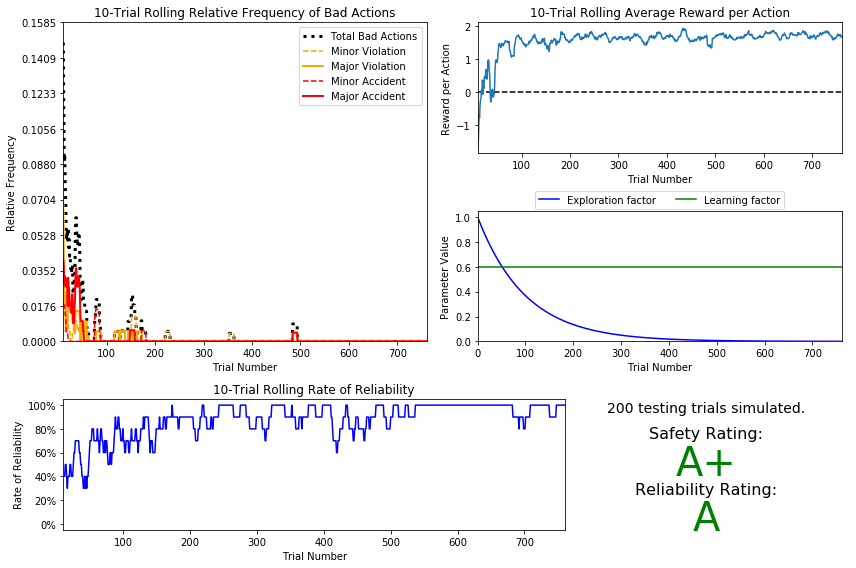

In [19]:
#tolerance = 0.0005
#update_delay = 0.01
#alpha = 0.6
# epsilon = math.e ** (-1 * 0.01 * self.trial)
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:** : I tried several decay functions and also adjusting values of tolerance and alpha. Some of the attempts you can see above the suitable decay functions I found were abs(cos(at)) and e^(-at). Both got A+ and A reliability rating on 100 testing trials but on 200 testing trials eluer decay function managed to maintain its rating while the cosine function could achieved a rating of A and A. Thus it seems the the cosine function varies a lot overtime.

The decaying function used of epsilon was e^(-0.01 x t)<br />
It took around 550-600 training trials before the agent began for testing<br />
I kept epsilon-tolerance at 0.0005, because it seemed to make sense to let that drop down near zero so the agent was more likely to explore the more expected states .<br />
I kept alpha decay 0.6 as when alpha is 1, the agent just learns, and when alpha is 0, the agent is just using its learned knowledge, so it seemed appropriate for it to be kept in right around the middle. <br />
The Reliability of the optimized Q-learner seemed to significantly increase from the default learner It took more number of training trials but it helped to learn a better policy. Also the average reward per action increased from 0.75 to around 1.75 or 2 for 20 testing trials <br />
This Q-Learner performed much better than the previous Q-learner, earning an A+ in Safety and an A in Reliability which would have been possible if the Q-learner would have framed a good policy in place. Thus I would say that it seems to have learn the appropriate policy. <br />
I am satisfied with the Smartcab agent's A+ ratings for safety and A rating for reliability after 200 tests trials.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:**  Definition of optimal policy for my state space (waypoint, light, oncoming) : If the light is red and the waypoint is not right the car must stay idle. For eg : (forward, red, none, right) the agent must choose the action to be none. If the light is green the agent must be moving but before moving it must check for the oncoming traffic. If the traffic is in the same direction of the agent's movement the agent should keep moving but if the traffic wants to turn in the opposite direction of the agent's movement than the agent must not take left turn or else accident might occur. For eg : (right, green,none, left) the agent must not turn left in this situation or (left, green,none, left) the agent can keep going or (left, green, right, none) here the agent must not take left. If the light is red and the waypoint is right than the agent must take right if the oncoming traffic is not moving left. <br />
A type of sub-optimal policy would be (forward, red, none, none) here the agent can stay idle or can take a right. <br />

Some of the policies created by the learner : <br />
('forward', 'green', None, None)
 -- forward : 1.46
 -- right : 0.00
 -- None : 0.00
 -- left : -0.01<br />
Here the signal is green and waypoint is forward and since there is no oncoming backward traffic and no left vehicle we can easily go forward. Seems to follow our defined optimal policy
 <br />
('forward', 'red', None, None)
 -- forward : -6.47
 -- right : -0.11
 -- None : 2.07
 -- left : -5.86<br />
  Here the signal is red so thus agent chooses to stay idle to maintain the traffic rules. Seems to follow our defined optimal policy
   <br />
('forward', 'green', None, None)
 -- forward : 2.40
 -- right : -0.27
 -- None : -2.59
 -- left : -0.30<br />
  Here signal is green waypoint is forward and no oncoming or left vehicle so the agent goes forward. Seems to follow our defined optimal policy
   <br />
('left', 'green', 'right', 'right')
 -- forward : 1.59
 -- right : 0.00
 -- None : -3.15
 -- left : 0.00<br />
    Here the signal is green the waypoint is left but the oncoming traffic and the vehilce on the left chooses to go right thus to avoid accident the agent learns to go forward instead. Seems to follow our defined optimal policy
   <br />
 ('forward', 'red', 'left', None)
 -- forward : -6.12
 -- right : 0.00
 -- None : 2.02
 -- left : -5.60<br />
     Here the signal is red so thus agent chooses to stay idle to maintain the traffic rules but it also tries to learn our sub-optimal policy.      
<br />
('right', 'red', 'right', 'forward')
 -- forward : -6.08
 -- right : 1.85
 -- None : -0.05
 -- left : -6.18
<br />
Here since the waypoint is right the agent learns to take the right turn when the light is red. Seems to follow our defined optimal policy<br /><br />
Incorrect/unexpected policy observation:<br />
('right', 'red', 'forward', 'forward')
 -- forward : 0.00
 -- right : 0.00
 -- None : 1.72
 -- left : 0.00<br />
 Here the agent should have taken a right turn but it decided to stay idle it seems the agent has not completely learnt the right turn rule. This means the final Q-learning agent is not as efficient as it could be.
 .<br /><br />
From the above results we can say that the learner has managed to learn a optimal policy by putting safety as its first priority

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.